# IMB Allgather performance comparison

In [25]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [26]:
import sys
sys.path.append('../../../python-modules')

In [27]:
from utilities import filemanip

In [28]:
from synthanalysis import imb

In [29]:
benchmark = "Allgather"
systems = ['ARCHER_CrayMPICH774',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

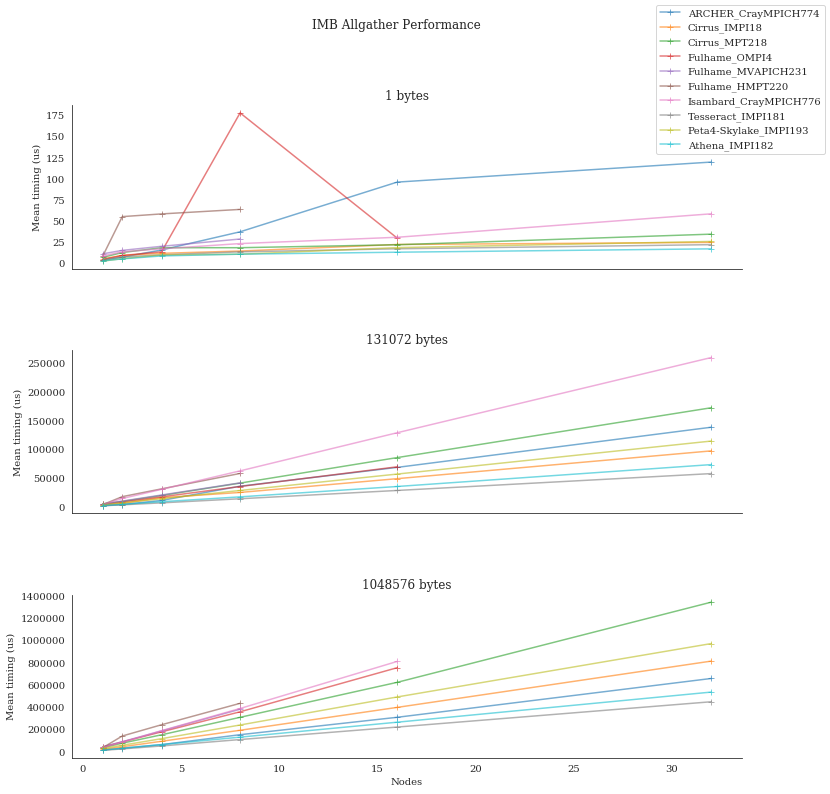

In [30]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

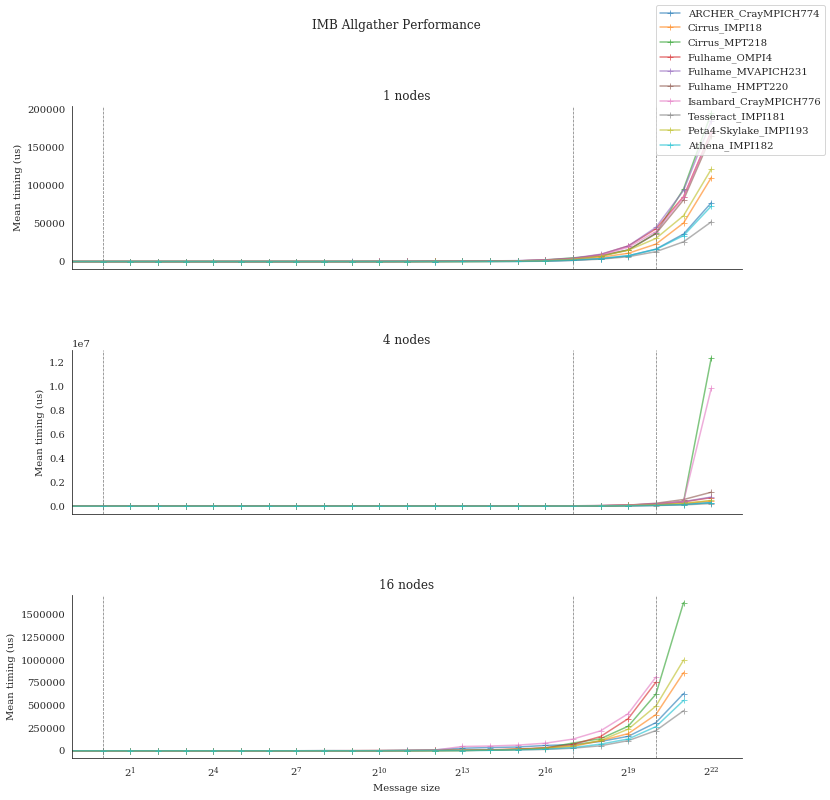

In [31]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} nodes".format(nodes), ylabel="Mean timing (us)")
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')

In [32]:
baseline = 'ARCHER_CrayMPICH774'
systems = ['Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)           

IMB Allgather performance relative to ARCHER_CrayMPICH774
            #nodes
      #bytes         1         2         4         8        16        32
Cirrus_IMPI18
           0      0.47      0.58      0.70      0.70      0.70      0.70
           1      0.68      0.79      1.33      2.54      4.27      4.80
           2      0.66      0.75      1.44      3.18      5.16      3.20
           4      0.62      0.73      1.41      2.20      4.23      2.14
           8      0.61      0.66      1.58      2.20      2.29      1.38
          16      0.64      0.73     11.13      2.17      2.28      0.69
          32      0.58      0.68      1.75      1.94      1.05      2.49
          64      0.61      0.62      1.56      0.94      2.89      2.12
         128      0.60      0.55      0.81      1.51      2.60      2.45
         256      0.62      0.41      1.33      2.30      6.74      1.43
         512      0.61      0.45      1.09      2.14      1.61      1.05
        1024      0.77      0.42 

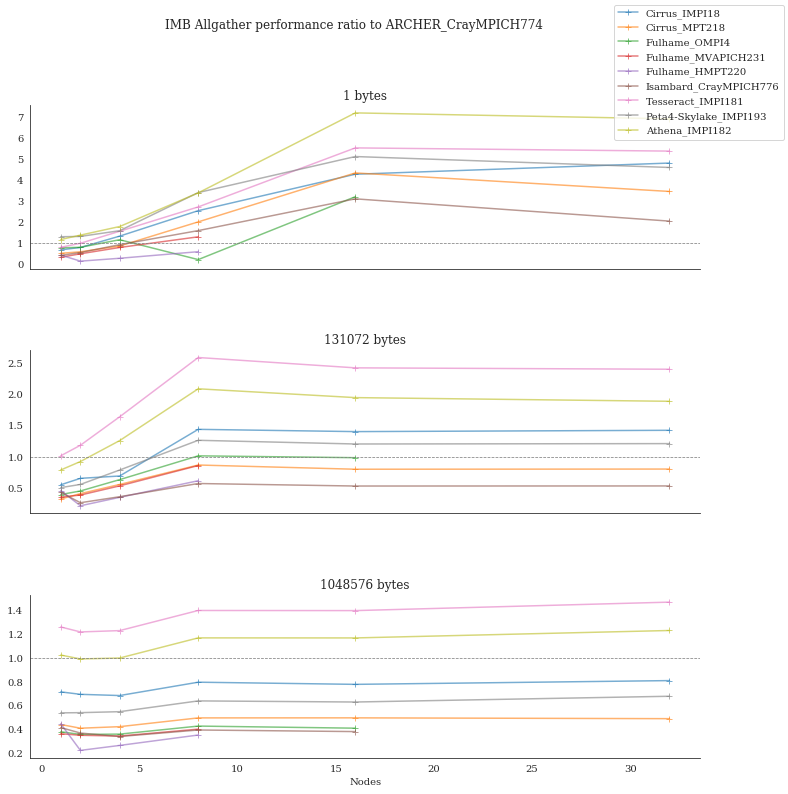

In [33]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

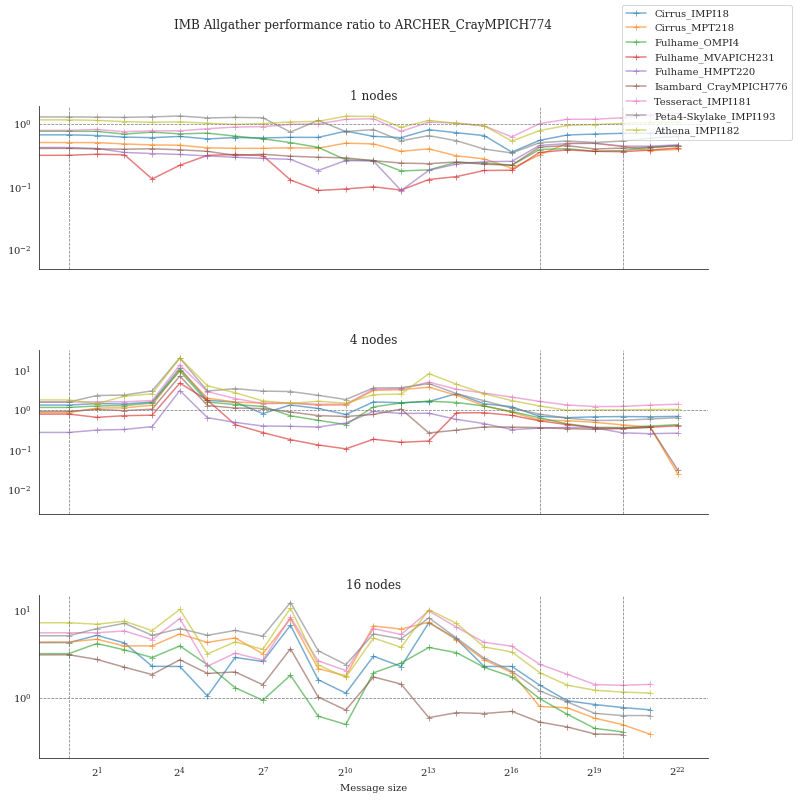

In [34]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} nodes".format(nodes))
    ax.set_yscale('log', basey=10)
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')